## VAR모형을 이용한 예측

### 삼성전자

In [ ]:
# pykrx를 사용하여 삼성전자 주가 데이터를 불러옵니다.
# 종가와 거래량을 포함한 데이터를 VAR 모델에 사용합니다.
# VAR 모델을 학습하고 향후 7일간의 주가를 예측합니다.
# 예측 결과를 시각화하고 출력합니다.

In [ ]:
#  model_fit.k_ar를 사용하여 모델의 래그(AR) 길이를 가져오고, 이를 이용해 예측 입력 데이터를 준비합니다. 
# 그런 다음 model_fit.forecast 메서드를 사용하여 향후 7일간의 주가를 예측합니다.

c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


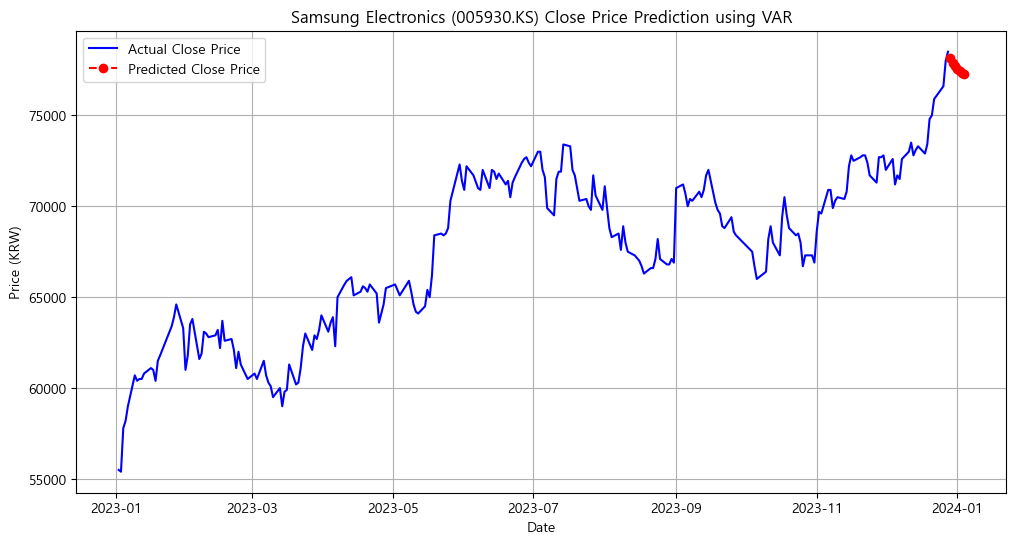

향후 1주일 주가 예측:
2023-12-29    78131.616575
2023-12-30    77855.569985
2023-12-31    77690.943819
2024-01-01    77570.052187
2024-01-02    77461.395348
2024-01-03    77356.171959
2024-01-04    77252.855334
Name: 종가, dtype: float64


In [2]:
import pandas as pd
from pykrx import stock
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# 데이터 불러오기
start_date = "20230101"
end_date = "20240101"
ticker = "005930"

# 삼성전자 주가 데이터 불러오기
df = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
df.index = pd.to_datetime(df.index)

# 데이터 전처리
# 필요한 열만 사용
data = df[['종가', '거래량']]

# VAR 모델 학습
model = VAR(data)
model_fit = model.fit(maxlags=15, ic='aic')

# 향후 7일 예측
forecast_input = data.values[-model_fit.k_ar:]
forecast = model_fit.forecast(y=forecast_input, steps=7)
forecast_df = pd.DataFrame(forecast, index=[data.index[-1] + pd.Timedelta(days=i) for i in range(1, 8)], columns=data.columns)

# 예측 결과 시각화
plt.figure(figsize=(12, 6))

# 실제 주가
plt.plot(data.index, data['종가'], label='Actual Close Price', color='blue')

# 예측 주가
plt.plot(forecast_df.index, forecast_df['종가'], label='Predicted Close Price', color='red', linestyle='--', marker='o')

plt.title('Samsung Electronics (005930.KS) Close Price Prediction using VAR')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# 예측 결과 출력
print("향후 1주일 주가 예측:")
print(forecast_df['종가'])


c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


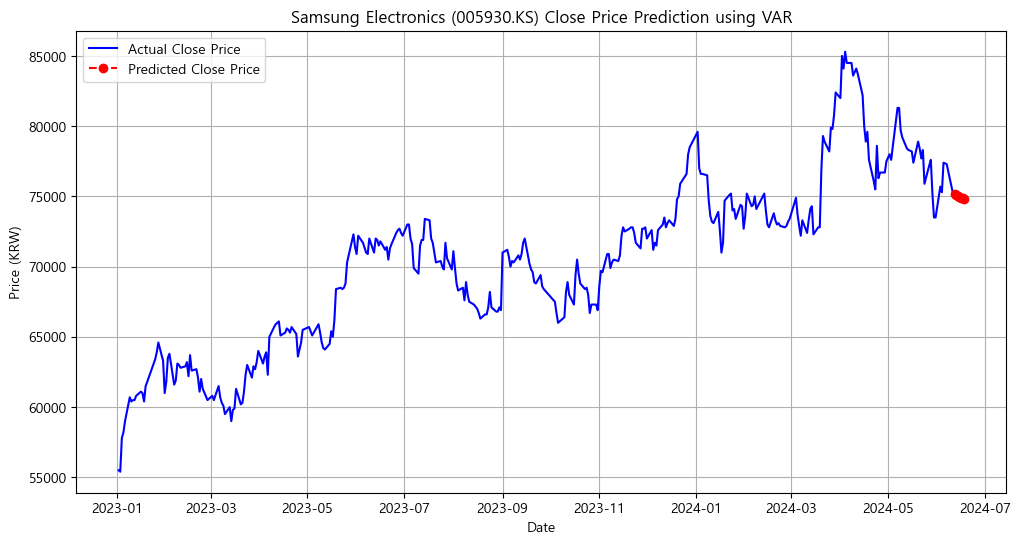

향후 1주일 주가 예측:
2024-06-12    75136.391798
2024-06-13    75076.652513
2024-06-14    75019.306962
2024-06-15    74963.713794
2024-06-16    74909.584704
2024-06-17    74856.781085
2024-06-18    74805.228025
Name: 종가, dtype: float64


In [4]:
import pandas as pd
from pykrx import stock
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# 데이터 불러오기
start_date = "20230101"
end_date = "20240611"
ticker = "005930"

# 삼성전자 주가 데이터 불러오기
df = stock.get_market_ohlcv_by_date(start_date, end_date, ticker)
df.index = pd.to_datetime(df.index)

# 데이터 전처리
# 필요한 열만 사용
data = df[['종가', '거래량']]

# VAR 모델 학습
model = VAR(data)
model_fit = model.fit(maxlags=15, ic='aic')

# 향후 7일 예측
forecast_input = data.values[-model_fit.k_ar:]
forecast = model_fit.forecast(y=forecast_input, steps=7)
forecast_df = pd.DataFrame(forecast, index=[data.index[-1] + pd.Timedelta(days=i) for i in range(1, 8)], columns=data.columns)

# 예측 결과 시각화
plt.figure(figsize=(12, 6))

# 실제 주가
plt.plot(data.index, data['종가'], label='Actual Close Price', color='blue')

# 예측 주가
plt.plot(forecast_df.index, forecast_df['종가'], label='Predicted Close Price', color='red', linestyle='--', marker='o')

plt.title('Samsung Electronics (005930.KS) Close Price Prediction using VAR')
plt.xlabel('Date')
plt.ylabel('Price (KRW)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# 예측 결과 출력
print("향후 1주일 주가 예측:")
print(forecast_df['종가'])


### KOSPI

In [ ]:
# KOSPI 지수 데이터에서 종가와 거래량을 불러옵니다.
# 종가와 거래량의 수익률을 계산합니다.
# 두 개의 수익률 데이터로 구성된 데이터프레임을 생성합니다.
# VAR 모델을 학습하고, 향후 7일간의 수익률을 예측합니다.
# 예측된 수익률을 시각화하고 출력합니다.

c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


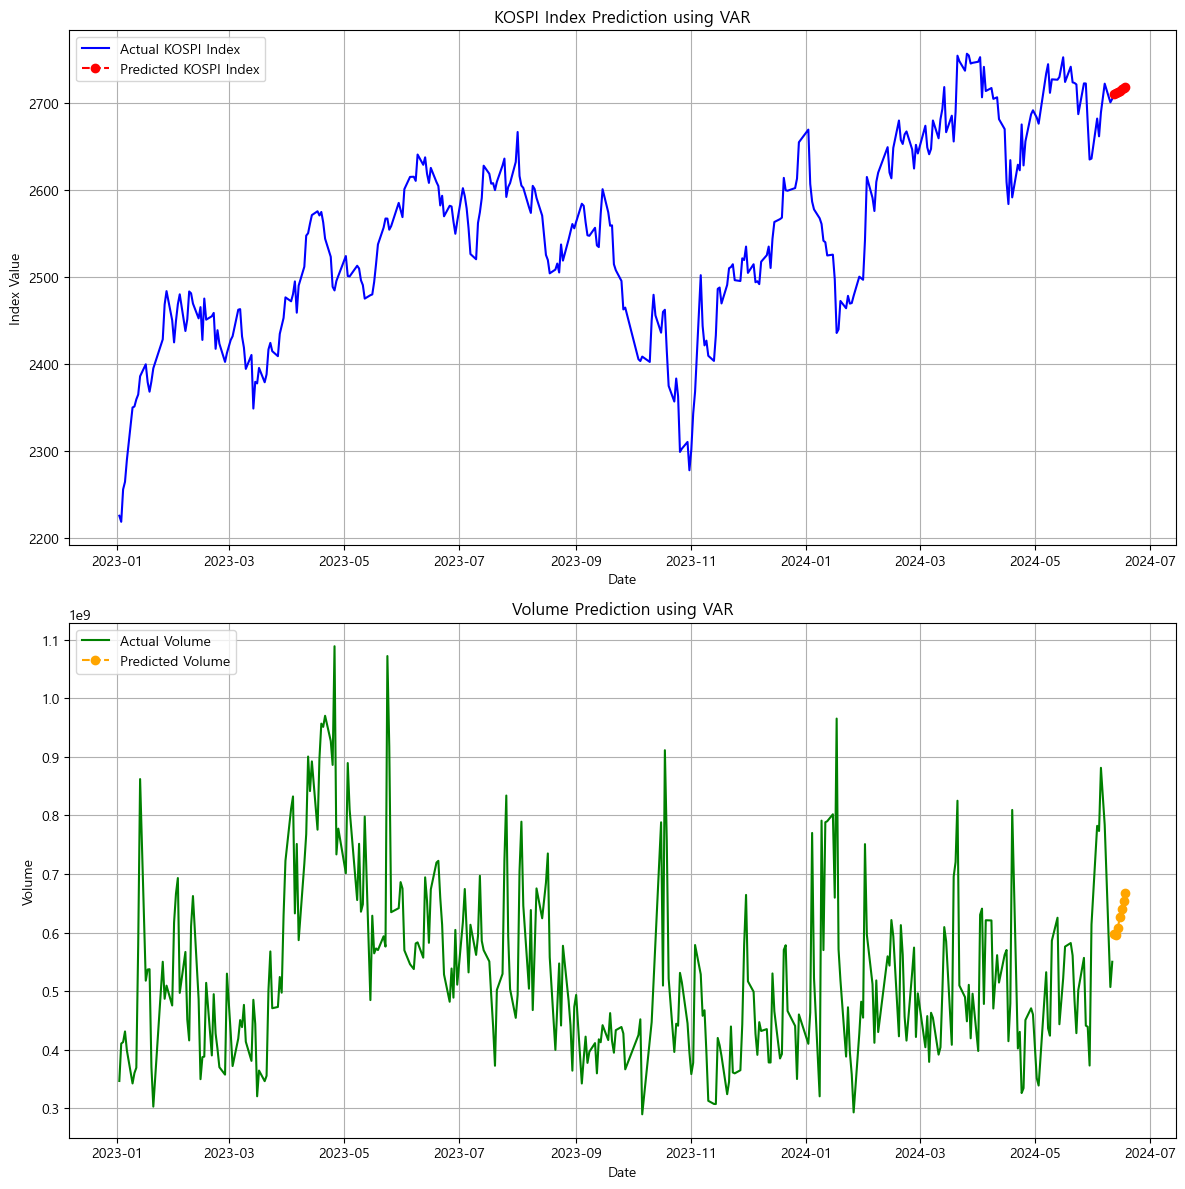

향후 1주일 KOSPI 지수 및 거래량 예측:
2024-06-12    2710.241538
2024-06-13    2712.139154
2024-06-14    2712.905241
2024-06-15    2714.520954
2024-06-16    2716.217893
2024-06-17    2717.722745
2024-06-18    2719.266134
dtype: float64
2024-06-12    5.978923e+08
2024-06-13    5.962006e+08
2024-06-14    6.084830e+08
2024-06-15    6.262320e+08
2024-06-16    6.394591e+08
2024-06-17    6.530770e+08
2024-06-18    6.674774e+08
dtype: float64


In [9]:
import pandas as pd
from pykrx import stock
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# KOSPI 지수 데이터 불러오기
start_date = "20230101"
end_date = "20240611"
kospi_df = stock.get_index_ohlcv_by_date(start_date, end_date, "1001")
kospi_df.index = pd.to_datetime(kospi_df.index)

# 수익률 계산 함수
def calculate_returns(prices):
    returns = prices.pct_change().dropna() * 100
    return returns

# KOSPI 종가 및 거래량 데이터
kospi_close_prices = kospi_df['종가']
kospi_volume = kospi_df['거래량']

# 종가와 거래량의 수익률 계산
kospi_returns = calculate_returns(kospi_close_prices)
kospi_volume_returns = calculate_returns(kospi_volume)

# 데이터프레임 생성
data = pd.concat([kospi_returns, kospi_volume_returns], axis=1)
data.columns = ['KOSPI_Returns', 'Volume_Returns']

# VAR 모델 학습
model = VAR(data)
model_fit = model.fit(maxlags=15, ic='aic')

# 향후 7일 예측
forecast_input = data.values[-model_fit.k_ar:]
forecast = model_fit.forecast(y=forecast_input, steps=7)
forecast_df = pd.DataFrame(forecast, index=[data.index[-1] + pd.Timedelta(days=i) for i in range(1, 8)], columns=data.columns)

# 예측된 수익률을 지수로 변환
last_close_price = kospi_close_prices.iloc[-1]
last_volume = kospi_volume.iloc[-1]

predicted_close_prices = [last_close_price * (1 + ret / 100) for ret in forecast_df['KOSPI_Returns'].cumsum()]
predicted_volumes = [last_volume * (1 + ret / 100) for ret in forecast_df['Volume_Returns'].cumsum()]

# 예측 결과 시각화
plt.figure(figsize=(12, 12))

# 실제 KOSPI 지수
plt.subplot(2, 1, 1)
plt.plot(kospi_close_prices.index, kospi_close_prices, label='Actual KOSPI Index', color='blue')
plt.plot(forecast_df.index, predicted_close_prices, label='Predicted KOSPI Index', color='red', linestyle='--', marker='o')
plt.title('KOSPI Index Prediction using VAR')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend(loc='upper left')
plt.grid(True)

# 실제 거래량
plt.subplot(2, 1, 2)
plt.plot(kospi_volume.index, kospi_volume, label='Actual Volume', color='green')
plt.plot(forecast_df.index, predicted_volumes, label='Predicted Volume', color='orange', linestyle='--', marker='o')
plt.title('Volume Prediction using VAR')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

# 예측 결과 출력
predicted_close_prices_series = pd.Series(predicted_close_prices, index=forecast_df.index)
predicted_volumes_series = pd.Series(predicted_volumes, index=forecast_df.index)
print("향후 1주일 KOSPI 지수 및 거래량 예측:")
print(predicted_close_prices_series)
print(predicted_volumes_series)


In [ ]:
# 결과 표시를 수익률로

c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\JYB\AppData\Local\Temp/ipykernel_10056/2799117929.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
c:\users\jyb\appdata\local\programs\python\python39\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


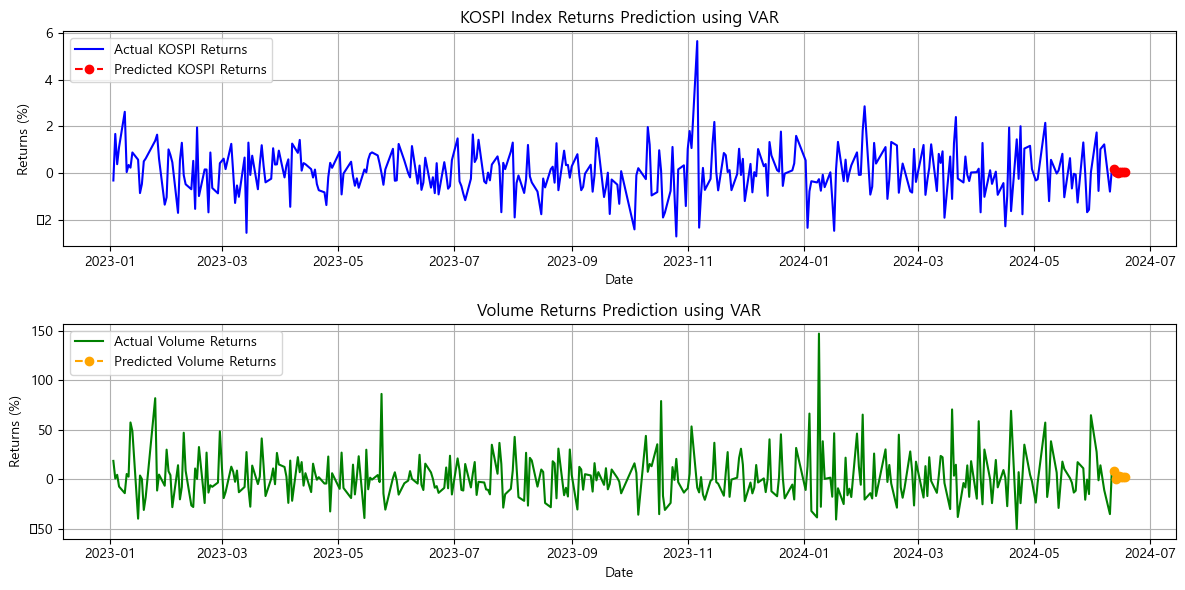

향후 1주일 수익률 예측:
            KOSPI_Returns  Volume_Returns
2024-06-12       0.181921        8.696915
2024-06-13       0.070144       -0.307554
2024-06-14       0.028318        2.232950
2024-06-15       0.059724        3.226771
2024-06-16       0.062726        2.404687
2024-06-17       0.055626        2.475730
2024-06-18       0.057050        2.618008


In [7]:
import pandas as pd
from pykrx import stock
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# KOSPI 지수 데이터 불러오기
start_date = "20230101"
end_date = "20240611"
kospi_df = stock.get_index_ohlcv_by_date(start_date, end_date, "1001")
kospi_df.index = pd.to_datetime(kospi_df.index)

# 수익률 계산 함수
def calculate_returns(prices):
    returns = prices.pct_change().dropna() * 100
    return returns

# KOSPI 종가 및 거래량 수익률 데이터
kospi_close_prices = kospi_df['종가']
kospi_volume = kospi_df['거래량']

# 종가와 거래량의 수익률 계산
kospi_returns = calculate_returns(kospi_close_prices)
kospi_volume_returns = calculate_returns(kospi_volume)

# 데이터프레임 생성
data = pd.concat([kospi_returns, kospi_volume_returns], axis=1)
data.columns = ['KOSPI_Returns', 'Volume_Returns']

# VAR 모델 학습
model = VAR(data)
model_fit = model.fit(maxlags=15, ic='aic')

# 향후 7일 예측
forecast_input = data.values[-model_fit.k_ar:]
forecast = model_fit.forecast(y=forecast_input, steps=7)
forecast_df = pd.DataFrame(forecast, index=[data.index[-1] + pd.Timedelta(days=i) for i in range(1, 8)], columns=data.columns)

# 예측 결과 시각화
plt.figure(figsize=(12, 6))

# 실제 KOSPI 수익률
plt.subplot(2, 1, 1)
plt.plot(data.index, data['KOSPI_Returns'], label='Actual KOSPI Returns', color='blue')
plt.plot(forecast_df.index, forecast_df['KOSPI_Returns'], label='Predicted KOSPI Returns', color='red', linestyle='--', marker='o')
plt.title('KOSPI Index Returns Prediction using VAR')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.legend(loc='upper left')
plt.grid(True)

# 실제 거래량 수익률
plt.subplot(2, 1, 2)
plt.plot(data.index, data['Volume_Returns'], label='Actual Volume Returns', color='green')
plt.plot(forecast_df.index, forecast_df['Volume_Returns'], label='Predicted Volume Returns', color='orange', linestyle='--', marker='o')
plt.title('Volume Returns Prediction using VAR')
plt.xlabel('Date')
plt.ylabel('Returns (%)')
plt.legend(loc='upper left')
plt.grid(True)

plt.tight_layout()
plt.show()

# 예측 결과 출력
print("향후 1주일 수익률 예측:")
print(forecast_df[['KOSPI_Returns', 'Volume_Returns']])
